In [1]:
from sklearn.datasets import load_wine
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import xgboost as xgb
from scipy.spatial import ConvexHull, Delaunay
import pickle
import os
import time
# import torch
# import torch.nn as nn
from tqdm.auto import tqdm
import numpy as np

In [2]:
# csv_df = pd.read_csv('https://vae-bed.s3.us-east-2.amazonaws.com/updated_renamed.csv')
csv_df = pd.read_csv('/Users/swarchol/Research/seal/data/updated_renamed.csv')

In [3]:
csv_df.columns

Index(['CellID', 'DNA', 'DNA (2)', 'DNA (3)', 'CD3', 'CD45RO', 'DNA (4)',
       'Pan-cytokeratin', 'Aortic smooth muscle actin', 'DNA (5)', 'CD4',
       'CD45', 'PD-1', 'DNA (6)', 'CD20', 'CD68', 'CD8a', 'DNA (7)', 'CD163',
       'FOXP3', 'PD-L1', 'DNA (8)', 'E-cadherin', 'Vimentin', 'CDX-2',
       'DNA (9)', 'Lamin-A/B/C', 'Desmin', 'CD31', 'DNA (10)', 'PCNA',
       'Collagen', 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength',
       'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation',
       'Sample', 'Condition', 'Replicate', 'emb1', 'emb2', 'cluster_2d',
       'UMAP_X', 'UMAP_Y', 'kmeans'],
      dtype='object')

In [4]:
columns = csv_df.columns
feature_columns = ['DNA', 'DNA (2)', 'DNA (3)', 'CD3', 'CD45RO', 'DNA (4)',
       'Pan-cytokeratin', 'Aortic smooth muscle actin', 'DNA (5)', 'CD4',
       'CD45', 'PD-1', 'DNA (6)', 'CD20', 'CD68', 'CD8a', 'DNA (7)', 'CD163',
       'FOXP3', 'PD-L1', 'DNA (8)', 'E-cadherin', 'Vimentin', 'CDX-2',
       'DNA (9)', 'Lamin-A/B/C', 'Desmin', 'CD31', 'DNA (10)', 'PCNA',
       'Collagen',]

<Axes: xlabel='UMAP_X', ylabel='UMAP_Y'>

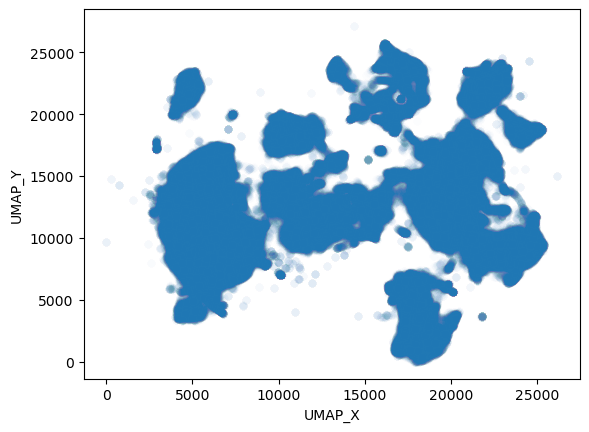

In [5]:
import seaborn as sns

sns.scatterplot(data=csv_df, x='UMAP_X', y='UMAP_Y', alpha=0.01)


In [6]:
# regressor = xgb.XGBRegressor()
regressor = xgb.XGBRegressor(
                 n_estimators=2000,
                 max_depth=9,
                 seed=1000)
# !wget https://vae-bed.s3.us-east-2.amazonaws.com/xgb_regressor.json -O xgb_regressor.json
regressor.load_model('xgb_regressor.json')



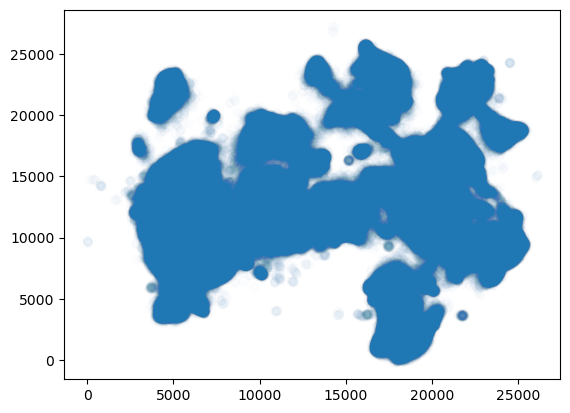

In [7]:
xgb_preds = regressor.predict(csv_df[feature_columns])
plt.scatter(xgb_preds[:,0], xgb_preds[:,1], alpha=0.01)
# label the x axis, y axis

In [8]:

# regressor.fit(csv_df[feature_columns], csv_df[['UMAP_X','UMAP_Y']])
# Save Regressor
# with open('xgb_regressor.pkl', 'wb') as f:
#     pickle.dump(regressor, f)

In [9]:
# with open('xgb_regressor.pkl', 'rb') as f:
#     regressor = pickle.load(f)


In [10]:
# regressor.save_model('xgb_regressor.json')
explainer = shap.Explainer(regressor)


In [11]:

chunks = np.array_split(csv_df[feature_columns], 1000)

shap_values_list = []
# shap_values_array = None
shap_values_array = np.load('shap_values_array.npy')

/Users/swarchol/mambaforge/envs/jupyter/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [12]:


# for chunk in tqdm(chunks, desc="Calculating SHAP values"):
#     if (chunk.index.stop) <= shap_values_array.shape[0]:
#         print(f"Skipping chunk {chunk.index.stop -1} because it is already in shap_values_array")
#     else:
#         shap_values = explainer(chunk)
#         # if shap_values_array is None:
#         #     shap_values_array = shap_values.values
#         # else:
#         shap_values_array = np.concatenate((shap_values_array, shap_values.values), axis=0)
#         np.save('shap_values_array.npy', shap_values_array)

In [13]:
shap_values_array = np.abs(shap_values_array)


In [14]:
summed_shap_values = shap_values_array.sum(axis=2)

<Axes: xlabel='UMAP_X', ylabel='UMAP_Y'>

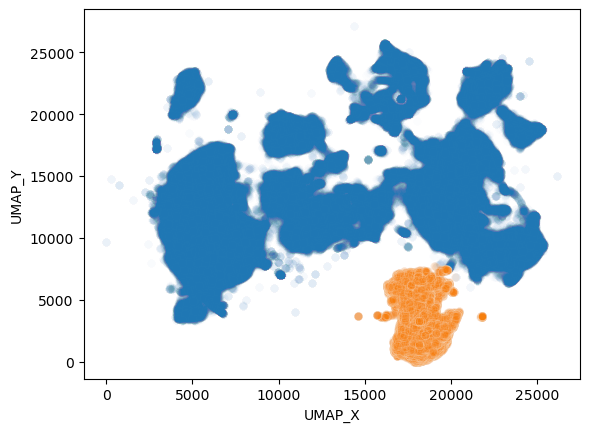

In [15]:
cluster = csv_df[csv_df.kmeans == 7]
sns.scatterplot(data = csv_df, x='UMAP_X', y='UMAP_Y', alpha=0.01)
sns.scatterplot(data = cluster, x='UMAP_X', y='UMAP_Y', alpha=0.1)
# sns.scatterplot(data=csv_df, x='UMAP_X', y='UMAP_Y', alpha=0.01)



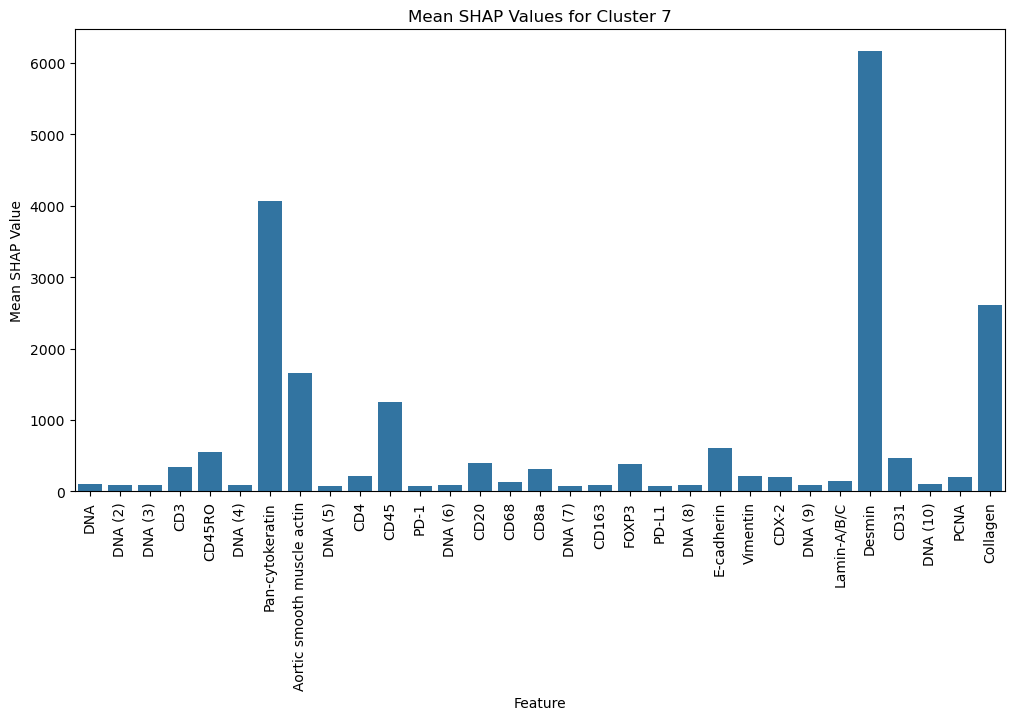

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming summed_shap_values and csv_df are predefined
# feature_columns are given in the prompt
feature_columns = ['DNA', 'DNA (2)', 'DNA (3)', 'CD3', 'CD45RO', 'DNA (4)',
       'Pan-cytokeratin', 'Aortic smooth muscle actin', 'DNA (5)', 'CD4',
       'CD45', 'PD-1', 'DNA (6)', 'CD20', 'CD68', 'CD8a', 'DNA (7)', 'CD163',
       'FOXP3', 'PD-L1', 'DNA (8)', 'E-cadherin', 'Vimentin', 'CDX-2',
       'DNA (9)', 'Lamin-A/B/C', 'Desmin', 'CD31', 'DNA (10)', 'PCNA',
       'Collagen']

# Extract cluster 7 indices and values
cluster_7 = csv_df[csv_df['kmeans'] == 7].index.tolist()
cluster_7_vals = summed_shap_values[cluster_7]
mean_cluster_7_vals = cluster_7_vals.mean(axis=0)

# Create a DataFrame for seaborn
df_plot = pd.DataFrame({'Feature': feature_columns, 'Mean SHAP Value': mean_cluster_7_vals})

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Mean SHAP Value', data=df_plot)
plt.xticks(rotation=90)
plt.title('Mean SHAP Values for Cluster 7')
plt.show()

In [17]:
old_feat_imp = np.load(f"/Users/swarchol/Research/seal/data/greg.shap.npy")
old_feat_imp.shape

(933253, 31, 2)

In [18]:
shap_values_array.shape
feature_columns = ['DNA', 'DNA (2)', 'DNA (3)', 'CD3', 'CD45RO', 'DNA (4)',
       'Pan-cytokeratin', 'Aortic smooth muscle actin', 'DNA (5)', 'CD4',
       'CD45', 'PD-1', 'DNA (6)', 'CD20', 'CD68', 'CD8a', 'DNA (7)', 'CD163',
       'FOXP3', 'PD-L1', 'DNA (8)', 'E-cadherin', 'Vimentin', 'CDX-2',
       'DNA (9)', 'Lamin-A/B/C', 'Desmin', 'CD31', 'DNA (10)', 'PCNA',
       'Collagen']

# Sort feature columns alphabetically
sorted_feature_columns = sorted(feature_columns)

# Get the mapping from old to new indices
old_to_new = {feature: i for i, feature in enumerate(feature_columns)}
new_to_old = {i: old_to_new[feature] for i, feature in enumerate(sorted_feature_columns)}

# Reorder shap_values_array using the mapping
reordered_shap_values = shap_values_array[:, [new_to_old[i] for i in range(len(feature_columns))], :]

# Update feature_columns to be sorted
feature_columns = sorted_feature_columns


In [19]:
reordered_shap_values.shape

(933253, 31, 2)

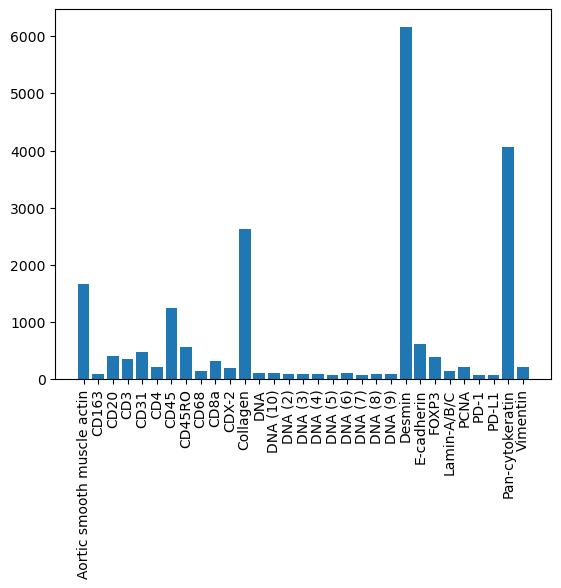

In [20]:
feature_columns = ['DNA', 'DNA (2)', 'DNA (3)', 'CD3', 'CD45RO', 'DNA (4)',
       'Pan-cytokeratin', 'Aortic smooth muscle actin', 'DNA (5)', 'CD4',
       'CD45', 'PD-1', 'DNA (6)', 'CD20', 'CD68', 'CD8a', 'DNA (7)', 'CD163',
       'FOXP3', 'PD-L1', 'DNA (8)', 'E-cadherin', 'Vimentin', 'CDX-2',
       'DNA (9)', 'Lamin-A/B/C', 'Desmin', 'CD31', 'DNA (10)', 'PCNA',
       'Collagen']

sorted_feature_columns = sorted(feature_columns)
cluster_7 = csv_df[csv_df['kmeans'] == 7].index.tolist()
cluster_7_vals = reordered_shap_values[cluster_7].sum(axis=2)
mean_cluster_7_vals = cluster_7_vals.mean(axis=0)
# bar plot of mean_cluster_7_vals, which have labels as feature_columns
plt.bar(sorted_feature_columns, mean_cluster_7_vals)
plt.xticks(rotation=90)
plt.show()


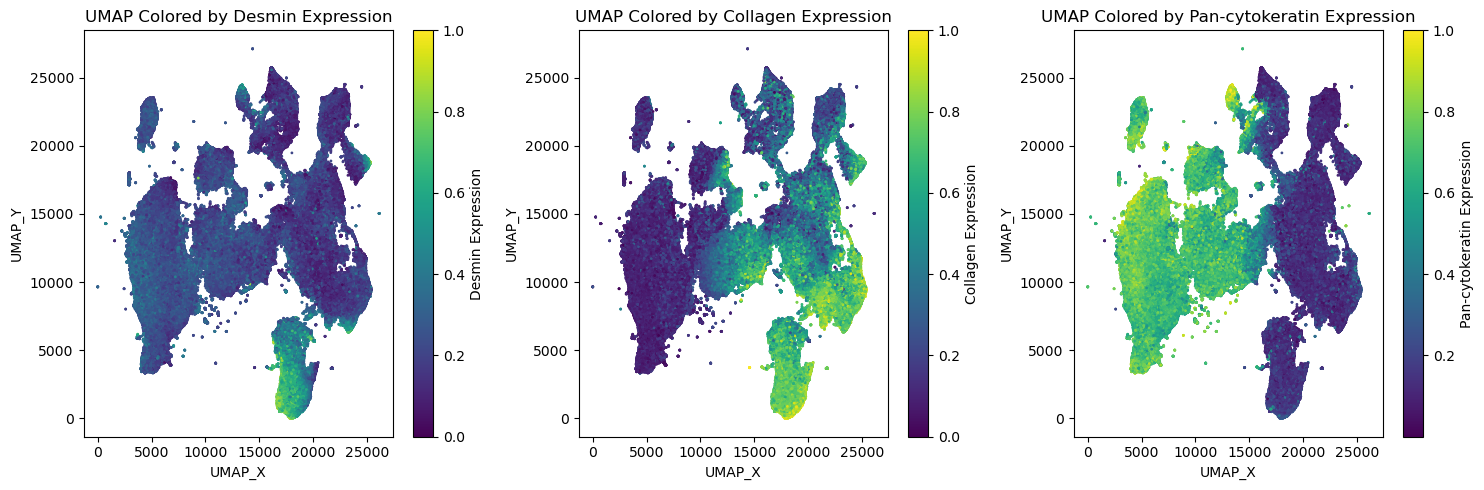

In [21]:
greg_df = csv_df
plt.figure(figsize=(15, 5))

# First subplot - UMAP with clusters


# Second subplot - UMAP with Desmin expression
plt.subplot(1, 3, 1)
scatter = plt.scatter(greg_df['UMAP_X'], greg_df['UMAP_Y'], c=greg_df['Desmin'], cmap='viridis', s=1)
plt.colorbar(scatter, label='Desmin Expression')
plt.xlabel('UMAP_X')
plt.ylabel('UMAP_Y')
plt.title('UMAP Colored by Desmin Expression')

# Second subplot - UMAP with Desmin expression
plt.subplot(1, 3, 2)
scatter = plt.scatter(greg_df['UMAP_X'], greg_df['UMAP_Y'], c=greg_df['Collagen'], cmap='viridis', s=1)
plt.colorbar(scatter, label='Collagen Expression')
plt.xlabel('UMAP_X')
plt.ylabel('UMAP_Y')
plt.title('UMAP Colored by Collagen Expression')


# Second subplot - UMAP with Desmin expression
plt.subplot(1, 3, 3)
scatter = plt.scatter(greg_df['UMAP_X'], greg_df['UMAP_Y'], c=greg_df['Pan-cytokeratin'], cmap='viridis', s=1)
plt.colorbar(scatter, label='Pan-cytokeratin Expression')
plt.xlabel('UMAP_X')
plt.ylabel('UMAP_Y')
plt.title('UMAP Colored by Pan-cytokeratin Expression')

plt.tight_layout()

In [22]:
import numpy as np
import matplotlib.pyplot as pl
import scipy.stats as st

# data = np.random.multivariate_normal((0, 0), [[0.8, 0.05], [0.05, 0.7]], 400)
x = greg_df['UMAP_X']
y = greg_df['UMAP_Y']
xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), y.max()

# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:1024j, ymin:ymax:1024j]



In [23]:
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

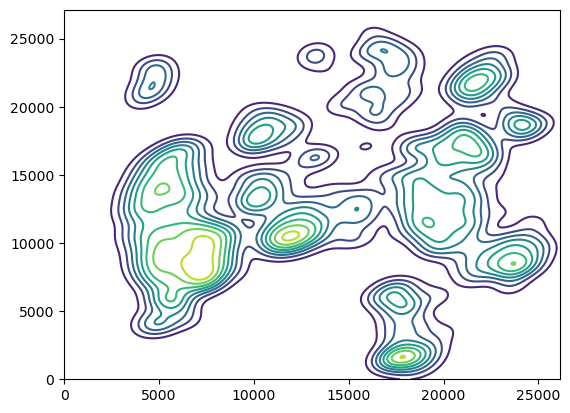

In [24]:
import matplotlib.contour as mcontour
fig, ax = plt.subplots()
contours = ax.contour(xx, yy, f, filled=False, levels=np.linspace(f.min(), f.max(), 10))
contour_lines = []
contours.allsegs
for seg in contours.allsegs:
    for line in seg:
        contour_lines.append(line.tolist())
        # plt.plot(line[:,0], line[:,1], 'k-')

In [25]:

len(contour_lines)

69

In [26]:
# dump contour_lines to a pickle file
with open('contour.greg.pkl', 'wb') as f:
    pickle.dump(contour_lines, f)


In [27]:
exemplar_df = pd.read_csv('/Users/swarchol/Research/exemplar-001/new/updated.csv')

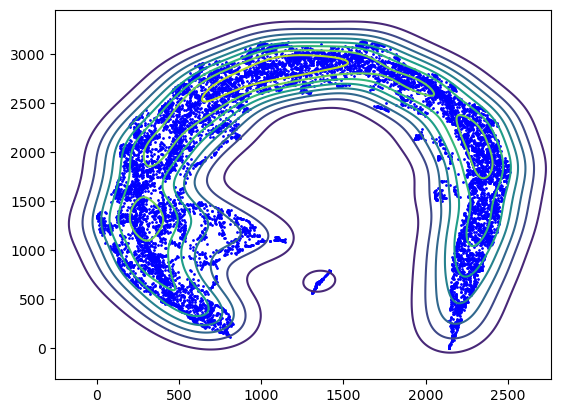

In [33]:
import numpy as np
import matplotlib.pyplot as pl
import scipy.stats as st

# data = np.random.multivariate_normal((0, 0), [[0.8, 0.05], [0.05, 0.7]], 400)
x = exemplar_df['UMAP_X']
y = exemplar_df['UMAP_Y']
xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), y.max()

# Expand the area to ensure contours are complete
xmin_expanded = xmin - (xmax - xmin) * 0.1  # 10% expansion on both sides
xmax_expanded = xmax + (xmax - xmin) * 0.1
ymin_expanded = ymin - (ymax - ymin) * 0.1
ymax_expanded = ymax + (ymax - ymin) * 0.1

# Peform the kernel density estimate with expanded area
xx, yy = np.mgrid[xmin_expanded:xmax_expanded:1024j, ymin_expanded:ymax_expanded:1024j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)
import matplotlib.contour as mcontour
fig, ax = plt.subplots()
contours = ax.contour(xx, yy, f, filled=False, levels=np.linspace(f.min(), f.max(), 10))
# plot the scatterplot of the points
plt.scatter(x, y, c='blue', s=1)
contour_lines = []
contours.allsegs
for seg in contours.allsegs:
    for line in seg:
        contour_lines.append(line.tolist())


In [34]:
# pickle contour_lines
with open('exemplar.contour.pkl', 'wb') as f:
    pickle.dump(contour_lines, f)
